# Carry out Visualization for the following questions:

1) Compare churn count with respect to gender. 

2) Find out how many female senior citizens there in the dataset 

3) Compare 'tenure' with 'Total Charges' 

4) Find out which contract preffered by the senior citizen. 

5) Comment on your finds on Payment Method?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Importing excel file into python envirnment

D=pd.read_excel('Telco-Customer-Churn.xlsx')
D

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 1. Comparing churn count with respect to gender

Total number of females is 3488
Total number of males = 3555


Text(0.5, 1.0, 'Churn count w.r.t Gender')

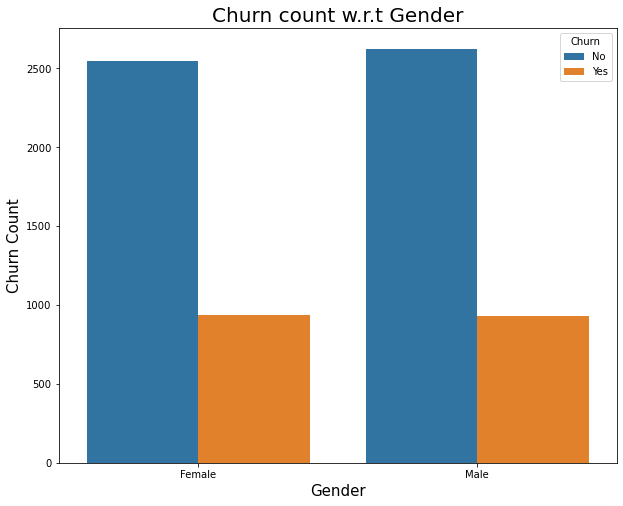

In [3]:
f=(D['gender']=='Female').sum() #total number of females
m=(D['gender']=='Male').sum() #total number of females
fc=((D['gender']=='Female') & (D['Churn']=='Yes')).sum()
mc=((D['gender']=='Male') & (D['Churn']=='Yes')).sum()   
print("Total number of females is",f)
print("Total number of males =",m)

#Plotting churn count with respect to gender
plt.figure(figsize=(10,8))
sns.countplot(x='gender',hue='Churn',data=D)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Churn Count',fontsize=15)
plt.title('Churn count w.r.t Gender',fontsize=20)

Insights: 939  female and  930  male customers have decided to stay with the connection

# 2.Finding how many female senior citizens there in the dataset

Male      3555
Female    3488
Name: gender, dtype: int64
number of female senior citizens= 568


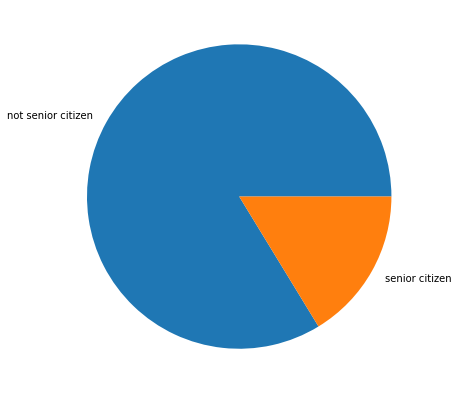

In [9]:
D1=D.sort_values('gender')
print(D1['gender'].value_counts())
fs=((D['gender']=='Female') & (D['SeniorCitizen']==1)).sum()
print('number of female senior citizens=',fs)

#plotting
x=[2921,568]
y=['not senior citizen','senior citizen']
plt.figure(figsize=(7,7))
plt.pie(x,labels=y)
plt.show()

Insights: Out of 3488 females 568 aresenior citizens.

# 3.Compare 'tenure' with 'Total Charges'

Text(0.5, 1.0, 'Tenure vs TotalCharges')

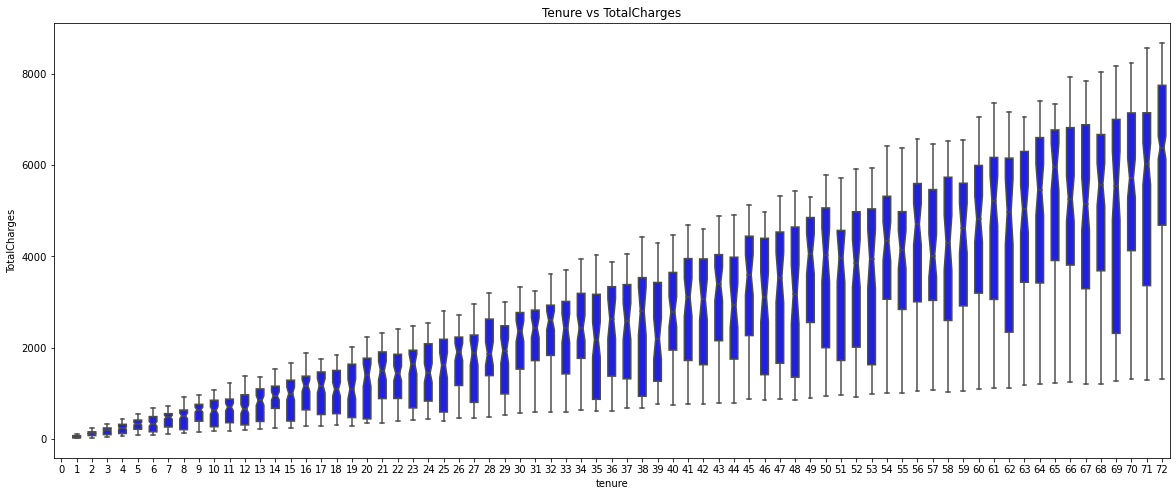

In [16]:
D['TotalCharges']=pd.to_numeric(D['TotalCharges'],downcast='float',errors='coerce')
D['TotalCharges']
plt.figure(figsize=(20, 8))
sns.boxplot(x="tenure",y='TotalCharges',data=D,width=0.5,notch=True,color='Blue')
plt.title("Tenure vs TotalCharges")

Insight: As tenure increases total charge also increases 

# 4.Contract preffered by the senior citizen

Total number of senior citizens = 1142
                  0
Contract           
Month-to-month  807
One year        190
Two year        145


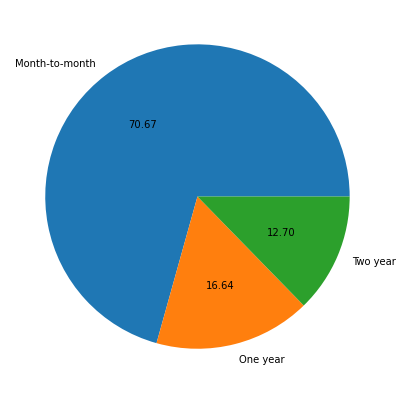

In [26]:
s=(D['SeniorCitizen'] == 1).sum() #Total number of senior citizens
print('Total number of senior citizens =',s)
print(D.loc[D['SeniorCitizen'] == 1, ['Contract']].value_counts().to_frame()) #number of senior citizens w.r.t Contract

#plotting
x=[807,190,145]
y=['Month-to-month','One year','Two year']
plt.figure(figsize=(7,7))
plt.pie(x,autopct= "%.2f",labels=y)
plt.show()

Insight:

Out of 1142 senior citizens, 807 (70.67%) prefer Month-to-month contract, 190 (16.64%) prefer One year contract and 145 (12.70%) prefer Two year contract

# 5.Findings on Payment Method

                           PaymentMethod
Electronic check                    2365
Mailed check                        1612
Bank transfer (automatic)           1544
Credit card (automatic)             1522


Text(0, 0.5, 'Frequency')

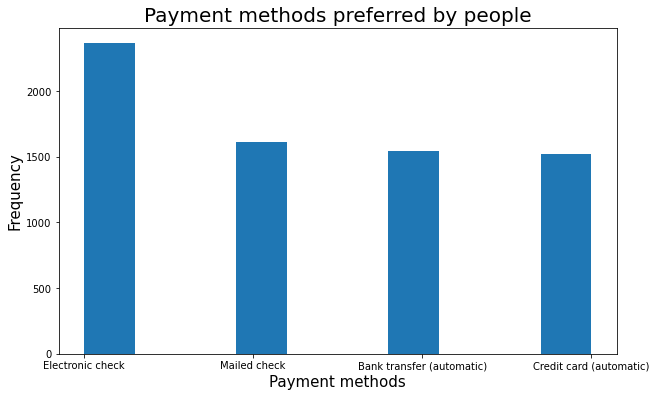

In [31]:
print(D['PaymentMethod'].value_counts().to_frame()) #Number of customers w.r.t payment method

#plotting
plt.figure(figsize=(10,6))
plt.hist(D['PaymentMethod'])
plt.title('Payment methods preferred by people',fontsize=20)
plt.xlabel('Payment methods',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

Insights:

Out of 7043 customers,

2365 opted 'Electronic check' Payment Method

1612 opted 'Mailed check' Payment Method

1612 opted 'Bank transfer (automatic)' Payment Method

1522 opted 'Credit card (automatic)' Payment Method